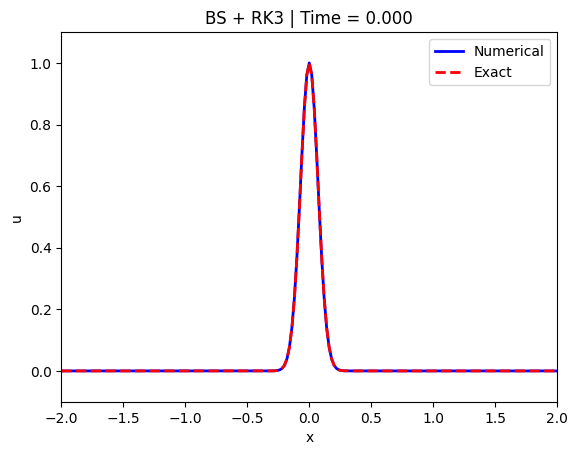

In [ ]:
# Run this in the first cell of your Jupyter notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# %matplotlib inline  # Use this if you're using classic Jupyter
# % matplotlib notebook  # Use this if you want interactive plots

# --- Parameters ---
c = 1.0
L = 2.0
nx = 201
x = np.linspace(-L, L, nx)
dx = x[1] - x[0]
al=100
CFL = 0.5
dt = CFL * dx / c
t_final = 1.0
nt = int(t_final / dt)

# --- Initial condition ---
def initial_condition(x):
    return np.exp(-al * x**2)

# --- Periodic BC helper ---
def apply_periodic(u):
    u[0] = u[-2]
    u[-1] = u[1]
    return u

# --- FTBS operator ---
def spatial_bs(u, c, dx):
    return -c * (u[1:-1] - u[0:-2]) / dx

# --- FTFS spatial operator ---
def spatial_fs(u, c, dx):
    return -c * (u[2:] - u[1:-1]) / dx

# --- FTCS spatial operator ---
def spatial_cs(u, c, dx):
    return -0.5 * c * (u[2:] - u[0:-2]) / dx
# --- RK3 + FTBS ---
def simulate_rk3(spatial_operator):
    u0 = initial_condition(x)
    u = np.concatenate(([u0[-2]], u0, [u0[1]]))  # Add ghost cells
    us = [u.copy()]
    ts = [0.0]

    for n in range(nt):
        un = u.copy()

        # Stage 1
        rhs1 = spatial_operator(un, c, dx)
        u1 = un[1:-1] + dt * rhs1
        u1_full = np.concatenate(([u1[-1]], u1, [u1[0]]))

        # Stage 2
        rhs2 = spatial_operator(u1_full, c, dx)
        u2 = 0.75 * un[1:-1] + 0.25 * (u1 + dt * rhs2)
        u2_full = np.concatenate(([u2[-1]], u2, [u2[0]]))

        # Stage 3
        rhs3 = spatial_operator(u2_full, c, dx)
        u[1:-1] = (1/3) * un[1:-1] + (2/3) * (u2 + dt * rhs3)

        u = apply_periodic(u)
        us.append(u.copy())
        ts.append((n + 1) * dt)
    return x, us, ts

# --- Exact solution ---
def exact_solution(x, t, c):
    return np.exp(-al * (x - c * t)**2)

# --- Run simulation ---
x, us, ts = simulate_rk3(spatial_bs)

# --- Animate ---
fig, ax = plt.subplots()
line_num, = ax.plot(x, us[0][1:-1], 'b-', lw=2, label='Numerical')
line_exact, = ax.plot(x, exact_solution(x, 0, c), 'r--', lw=2, label='Exact')
ax.set_xlim(-L, L)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.legend()
title = ax.set_title("")

def animate(i):
    line_num.set_ydata(us[i][1:-1])
    line_exact.set_ydata(exact_solution(x, ts[i], c))
    title.set_text(f"BS + RK3 | Time = {ts[i]:.3f}")
    return line_num, line_exact, title

ani = FuncAnimation(fig, animate, frames=len(us), interval=30)

# --- Display animation in Jupyter ---
HTML(ani.to_jshtml())

# ani.save("linear_convection_RK3BS.mp4", writer='ffmpeg', fps=30)

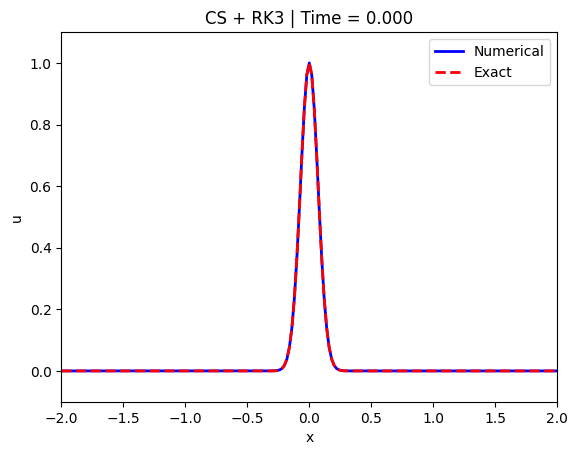

In [ ]:

# --- Run simulation ---
x, us, ts = simulate_rk3(spatial_cs)

# --- Animate ---
fig, ax = plt.subplots()
line_num, = ax.plot(x, us[0][1:-1], 'b-', lw=2, label='Numerical')
line_exact, = ax.plot(x, exact_solution(x, 0, c), 'r--', lw=2, label='Exact')
ax.set_xlim(-L, L)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.legend()
title = ax.set_title("")

def animate(i):
    line_num.set_ydata(us[i][1:-1])
    line_exact.set_ydata(exact_solution(x, ts[i], c))
    title.set_text(f"CS + RK3 | Time = {ts[i]:.3f}")
    return line_num, line_exact, title

ani = FuncAnimation(fig, animate, frames=len(us), interval=30)

# --- Display animation in Jupyter ---
HTML(ani.to_jshtml())

# ani.save("linear_convection_RK3CS.mp4", writer='ffmpeg', fps=30)

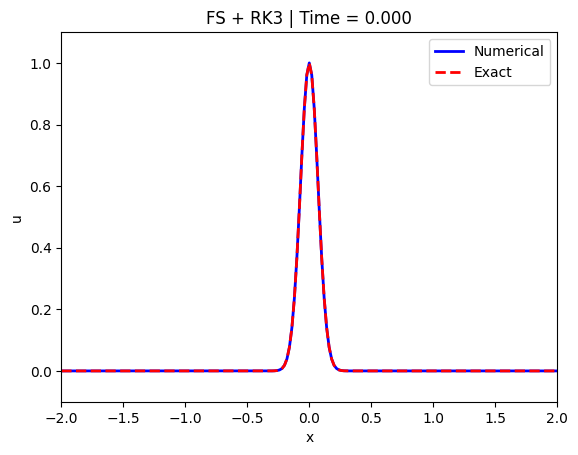

In [ ]:

# --- Run simulation ---
x, us, ts = simulate_rk3(spatial_fs)

# --- Animate ---
fig, ax = plt.subplots()
line_num, = ax.plot(x, us[0][1:-1], 'b-', lw=2, label='Numerical')
line_exact, = ax.plot(x, exact_solution(x, 0, c), 'r--', lw=2, label='Exact')
ax.set_xlim(-L, L)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.legend()
title = ax.set_title("")

def animate(i):
    line_num.set_ydata(us[i][1:-1])
    line_exact.set_ydata(exact_solution(x, ts[i], c))
    title.set_text(f"FS + RK3 | Time = {ts[i]:.3f}")
    return line_num, line_exact, title

ani = FuncAnimation(fig, animate, frames=len(us), interval=30)

# --- Display animation in Jupyter ---
HTML(ani.to_jshtml())

# ani.save("linear_convection_RK3FS.mp4", writer='ffmpeg', fps=30)

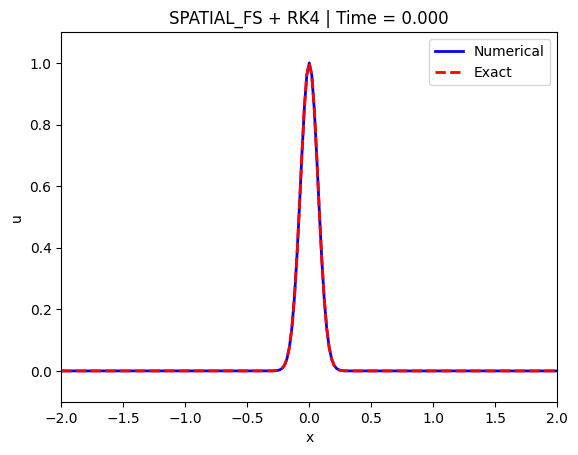

In [31]:
# --- RK4 time integration ---
def simulate_rk4(spatial_operator):
    u0 = initial_condition(x)
    u = np.concatenate(([u0[-2]], u0, [u0[1]]))  # ghost cells
    us = [u.copy()]
    ts = [0.0]

    for n in range(nt):
        un = u.copy()

        # Stage 1
        k1 = spatial_operator(un, c, dx)

        # Stage 2
        u2_full = np.concatenate(([un[-2]], un[1:-1] + 0.5 * dt * k1, [un[1]]))
        k2 = spatial_operator(u2_full, c, dx)

        # Stage 3
        u3_full = np.concatenate(([un[-2]], un[1:-1] + 0.5 * dt * k2, [un[1]]))
        k3 = spatial_operator(u3_full, c, dx)

        # Stage 4
        u4_full = np.concatenate(([un[-2]], un[1:-1] + dt * k3, [un[1]]))
        k4 = spatial_operator(u4_full, c, dx)

        # Update
        u[1:-1] = un[1:-1] + (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

        u = apply_periodic(u)
        us.append(u.copy())
        ts.append((n+1) * dt)
    return x, us, ts

# Choose a scheme: FTBS, FTFS, or FTCS
scheme = spatial_fs  # or spatial_ftcs, spatial_ftfs

# Run simulation with RK4
x, us, ts = simulate_rk4(scheme)

# Animate
fig, ax = plt.subplots()
line_num, = ax.plot(x, us[0][1:-1], 'b-', lw=2, label='Numerical')
line_exact, = ax.plot(x, exact_solution(x, 0, c), 'r--', lw=2, label='Exact')
ax.set_xlim(-L, L)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.legend()
title = ax.set_title("")

def animate(i):
    line_num.set_ydata(us[i][1:-1])
    line_exact.set_ydata(exact_solution(x, ts[i], c))
    title.set_text(f"{scheme.__name__.upper()} + RK4 | Time = {ts[i]:.3f}")
    return line_num, line_exact, title

ani = FuncAnimation(fig, animate, frames=len(us), interval=30)
HTML(ani.to_jshtml())
